In [ ]:
pip install matplotlib

In [ ]:
pip install munkres


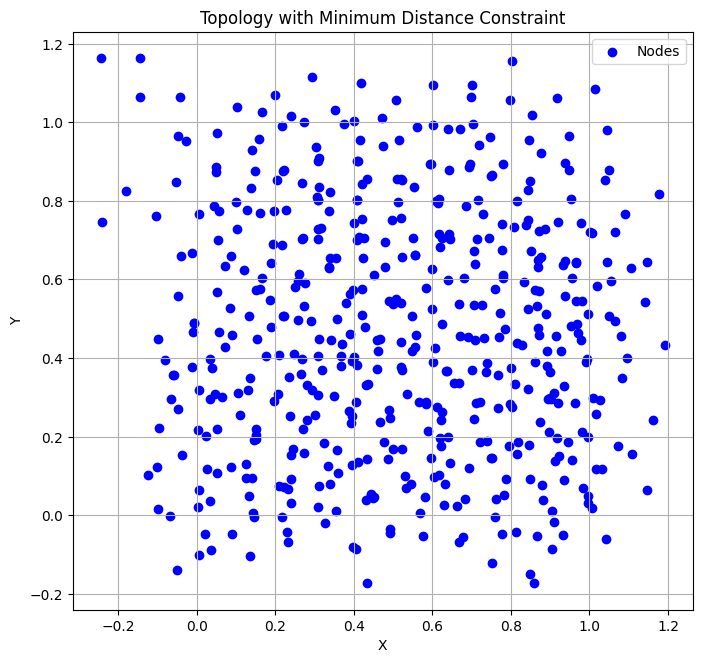

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_topology(num_nodes, d_min):
    # Generate random initial coordinates
    node_coords = np.random.rand(num_nodes, 2)


    for i in range(num_nodes):
        for j in range(i):
            # Calculate distance between nodes i and j
            dist = np.linalg.norm(node_coords[i] - node_coords[j])


            if dist < d_min:
                # Calculate unit vector between nodes i and j
                unit_vector = (node_coords[i] - node_coords[j]) / dist


                node_coords[i] += (d_min - dist) * unit_vector

    return node_coords

def plot_topology(node_coords, d_min):
    plt.figure(figsize=(8, 8))
    plt.scatter(node_coords[:, 0], node_coords[:, 1], color='blue', label='Nodes')
    plt.title('Topology with Minimum Distance Constraint')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

if __name__ == "__main__":
    num_nodes = 500
    d_min = 0.1


    node_coords = generate_topology(num_nodes, d_min)


    plot_topology(node_coords, d_min)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def haversine(lat1, lon1, lat2, lon2):

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

def generate_topology(num_nodes, d_min):

    node_coords = np.random.rand(num_nodes, 2) * 180 - 90


    for i in range(num_nodes):
        for j in range(i):
            # Calculate distance between nodes i and j
            dist = haversine(node_coords[i, 0], node_coords[i, 1], node_coords[j, 0], node_coords[j, 1])


            if dist < d_min:
                # Calculate unit vector between nodes i and j
                unit_vector = (node_coords[i] - node_coords[j]) / dist

                # Move node i away from node j along the unit vector
                node_coords[i] += (d_min - dist) * unit_vector

    return node_coords



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


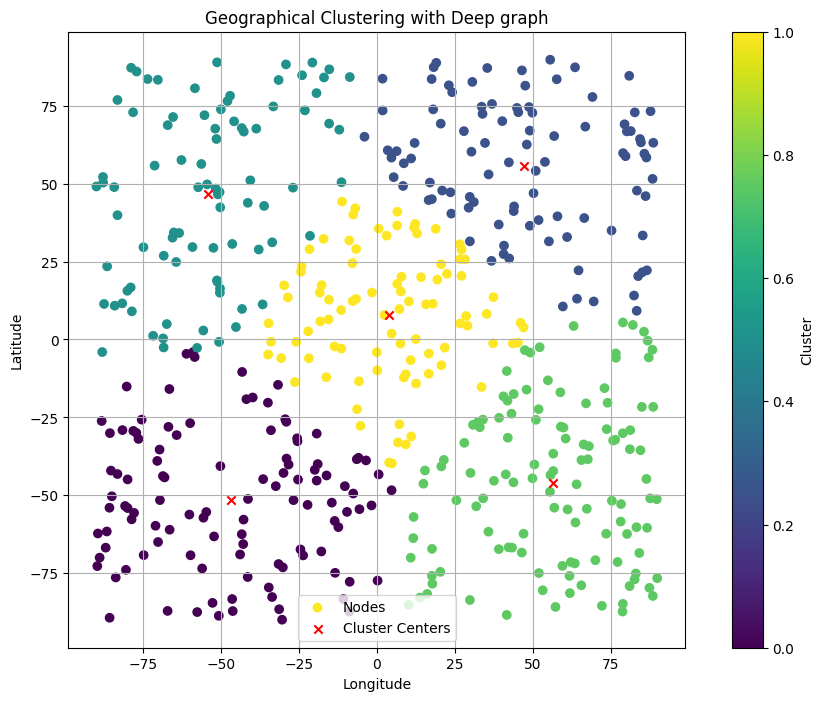

In [ ]:
def plot_topology(node_coords, cluster_labels, cluster_centers, d_min):
    plt.figure(figsize=(12, 8))
    plt.scatter(node_coords[:, 1], node_coords[:, 0], c=cluster_labels, cmap='viridis', label='Nodes')
    plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='x', label='Cluster Centers')
    plt.title('Geographical Clustering with Deep graph')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar(label='Cluster')
    plt.show()

if __name__ == "__main__":
    num_nodes = 500
    d_min = 50
    num_clusters = 5

    node_coords = generate_topology(num_nodes, d_min)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(node_coords)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    # Plot topology with geographical clustering
    plot_topology(node_coords, cluster_labels, cluster_centers, d_min)


In [ ]:
import numpy as np
from munkres import Munkres
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import adjusted_rand_score as ari_score
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_residual_energy(node_energy, max_energy):
    return node_energy / max_energy

def normalize_probabilities(probabilities):
    total_probability = np.sum(probabilities)
    return probabilities / total_probability

def select_cluster_heads_by_energy(node_coords, cluster_labels, energy_levels):
    unique_clusters = np.unique(cluster_labels)
    cluster_heads = []

    for cluster in unique_clusters:
        cluster_nodes = np.where(cluster_labels == cluster)[0]
        probabilities = normalize_probabilities(energy_levels[cluster_nodes])
        cluster_head_index = np.random.choice(cluster_nodes, p=probabilities)
        cluster_heads.append(cluster_head_index)

    return cluster_heads

if __name__ == "__main__":
    num_nodes = 500
    d_min = 50
    num_clusters = 5


    node_coords = generate_topology(num_nodes, d_min)


    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(node_coords)
    cluster_labels = kmeans.labels_

    # Calculate residual energy
    node_energy = np.random.rand(num_nodes)
    max_energy = np.max(node_energy)
    energy_levels = calculate_residual_energy(node_energy, max_energy)

    # Select Cluster Heads using axiomatic probability
    cluster_heads_indices = select_cluster_heads_by_energy(node_coords, cluster_labels, energy_levels)
    cluster_heads_coordinates = node_coords[cluster_heads_indices]

    print("Cluster Heads Indices:", cluster_heads_indices)
    print("Cluster Heads Coordinates:", cluster_heads_coordinates)


Cluster Heads Indices: [13, 295, 432, 76, 474]
Cluster Heads Coordinates: [[ 42.26790715   0.52213673]
 [ 43.75348281 -24.38249122]
 [-67.68493623  29.21617068]
 [ 26.41701877 -24.20886814]
 [-67.74330197 -45.7316448 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


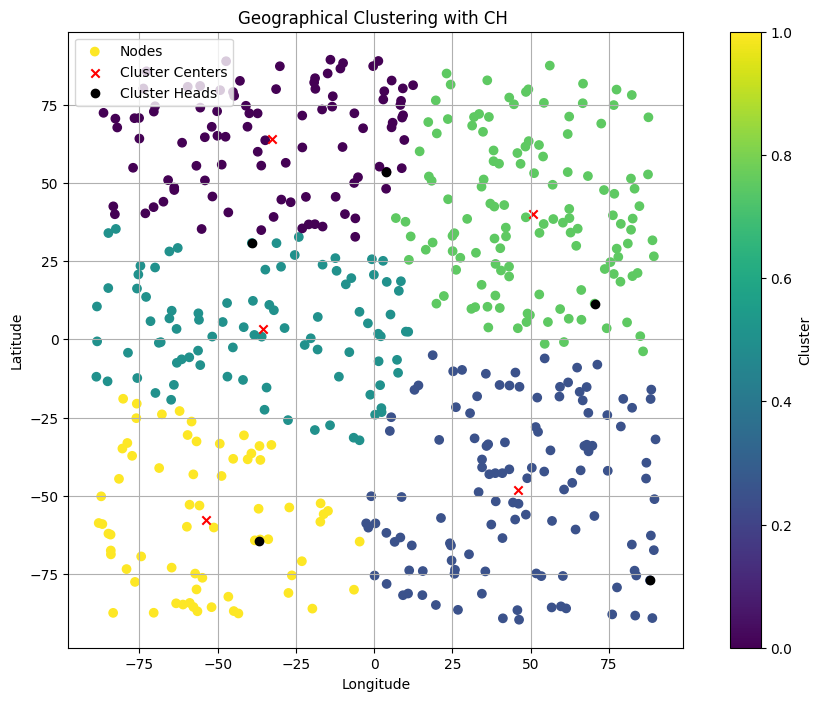

In [ ]:
def plot_topology(node_coords, cluster_labels, cluster_centers, d_min, cluster_heads_coordinates=None):
    plt.figure(figsize=(12, 8))
    plt.scatter(node_coords[:, 1], node_coords[:, 0], c=cluster_labels, cmap='viridis', label='Nodes')
    plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='x', label='Cluster Centers')
    if cluster_heads_coordinates is not None:
        plt.scatter(cluster_heads_coordinates[:, 1], cluster_heads_coordinates[:, 0], c='black', marker='o', label='Cluster Heads')
    plt.title('Geographical Clustering with CH ')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar(label='Cluster')
    plt.show()

if __name__ == "__main__":
    num_nodes = 500
    d_min = 50
    num_clusters = 5

    # Generate topology with geographical coordinates
    node_coords = generate_topology(num_nodes, d_min)

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(node_coords)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    # Select Cluster Heads using axiomatic probability
    cluster_heads_indices = select_cluster_heads_by_energy(node_coords, cluster_labels, energy_levels)
    cluster_heads_coordinates = node_coords[cluster_heads_indices]


    plot_topology(node_coords, cluster_labels, cluster_centers, d_min, cluster_heads_coordinates)


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def haversine(lat1, lon1, lat2, lon2):




def generate_topology(num_nodes, d_min):
    # Generate random initial coordinates
    node_coords = np.random.rand(num_nodes, 2) * 180 - 90




    return node_coords


def calculate_residual_energy(node_energy, max_energy):
    return node_energy / max_energy


def normalize_probabilities(probabilities):
    total_probability = np.sum(probabilities)
    return probabilities / total_probability

# Function to select cluster heads based on energy levels
def select_cluster_heads_by_energy(node_coords, cluster_labels, energy_levels):
    unique_clusters = np.unique(cluster_labels)
    cluster_heads = []

    for cluster in unique_clusters:
        cluster_nodes = np.where(cluster_labels == cluster)[0]
        probabilities = normalize_probabilities(energy_levels[cluster_nodes])
        cluster_head_index = np.random.choice(cluster_nodes, p=probabilities)
        cluster_heads.append(cluster_head_index)

    return cluster_heads

num_nodes = 500
d_min = 50
num_clusters = 5

# Generate topology with geographical coordinates
node_coords = generate_topology(num_nodes, d_min)


kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(node_coords)
cluster_labels = kmeans.labels_


node_energy = np.random.rand(num_nodes)
max_energy = np.max(node_energy)
energy_levels = calculate_residual_energy(node_energy, max_energy)


cluster_heads_indices = select_cluster_heads_by_energy(node_coords, cluster_labels, energy_levels)
cluster_heads_coordinates = node_coords[cluster_heads_indices]

print("Cluster Heads Indices:", cluster_heads_indices)
print("Cluster Heads Coordinates:", cluster_heads_coordinates)



Cluster Heads Indices: [226, 341, 108, 434, 238]
Cluster Heads Coordinates: [[-50.9412946  -44.60791351]
 [ 61.66327449  51.03936943]
 [ 31.25514962 -60.79660287]
 [-14.36917177  47.30336494]
 [ -1.97379197  13.67922457]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


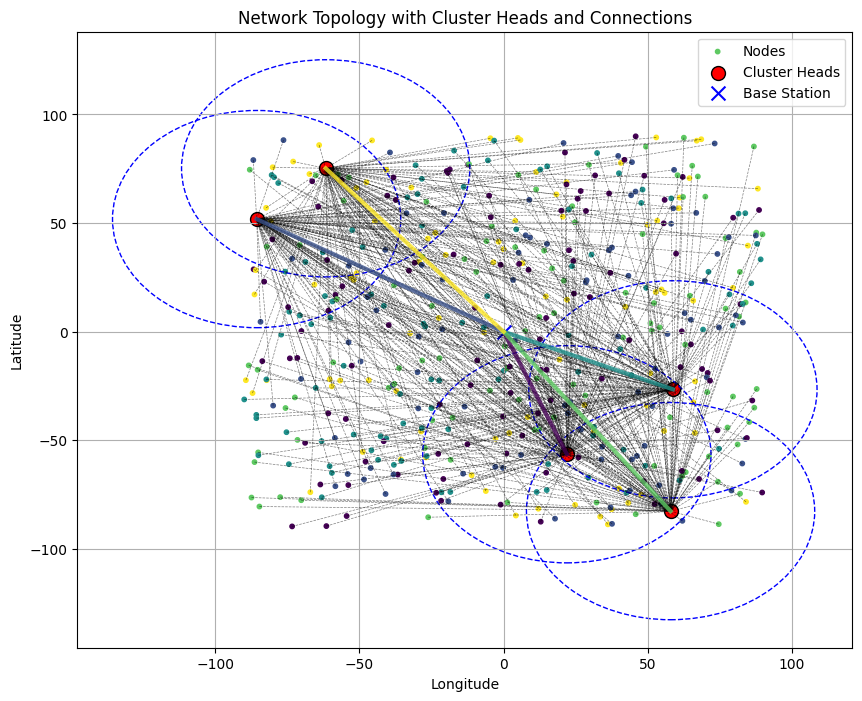

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_topology(node_coords, cluster_labels, cluster_heads_indices, base_station_coords):
    plt.figure(figsize=(10, 8))

    plt.scatter(node_coords[:, 0], node_coords[:, 1], c=cluster_labels, cmap='viridis', label='Nodes', s=10)


    plt.scatter(node_coords[cluster_heads_indices, 0], node_coords[cluster_heads_indices, 1], c='red', marker='o', label='Cluster Heads', s=100, edgecolors='black')


    for i, head_index in enumerate(cluster_heads_indices):
        cluster_nodes = np.where(cluster_labels == i)[0]
        for node_index in cluster_nodes:
            plt.plot([node_coords[node_index, 0], node_coords[head_index, 0]],
                     [node_coords[node_index, 1], node_coords[head_index, 1]],
                     linestyle='--', color='black', alpha=0.5, linewidth=0.5)


    for head_index in cluster_heads_indices:
        head_coords = node_coords[head_index]
        radius = 50
        circle = plt.Circle((head_coords[0], head_coords[1]), radius, color='blue', fill=False, linestyle='--', linewidth=1)
        plt.gca().add_patch(circle)


    colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_heads_indices)))
    for i, head_index in enumerate(cluster_heads_indices):
        head_coords = node_coords[head_index]
        plt.plot([head_coords[0], base_station_coords[0, 0]],
                 [head_coords[1], base_station_coords[0, 1]],
                 linestyle='-', color=colors[i], alpha=0.8, linewidth=3)

    plt.scatter(base_station_coords[:, 0], base_station_coords[:, 1], c='blue', marker='x', label='Base Station', s=100)

    plt.title('Network Topology with Cluster Heads and Connections')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    plt.show()

num_nodes = 500
d_min = 50
num_clusters = 5

node_coords = generate_topology(num_nodes, d_min)

base_station_coords = np.array([[0, 0]])


cluster_labels = np.random.randint(0, num_clusters, num_nodes)
cluster_heads_indices = np.random.choice(num_nodes, num_clusters, replace=False)


plot_topology(node_coords, cluster_labels, cluster_heads_indices, base_station_coords)


In [ ]:
from google.colab import files
upload = files.upload()

Saving The original data.xlsx to The original data.xlsx


In [ ]:
import pandas as pd


df = pd.read_excel("/content/The original data.xlsx")


print(df)


   Customer ID Sub-task number Factory number  \
0           h1              i1             M1   
1           h1              i2             M1   
2           h1              i3             M1   
3           h1              i4             M1   
4           h1              i5             M1   
5           h1              i8             M1   
6          ...             NaN            NaN   
7          h10              i6             M5   
8          h10              i7             M5   
9          h10              i8             M5   
10         h10              i9             M5   
11         h10             i10             M5   

    Unit Manufacturing Cost (unit: Chinese dollars).  
0                                              15.16  
1                                               4.83  
2                                              23.56  
3                                               7.16  
4                                              49.18  
5                               

In [ ]:

total_rows, total_columns = df.shape

print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")


Total number of rows: 12
Total number of columns: 4


In [ ]:
pip install pandas schedule


In [ ]:
import pandas as pd


df.dropna(inplace=True)


df.sort_values(by=['Customer ID', 'Factory number', 'Sub-task number'], inplace=True)


df['Start Time Position'] = df.groupby(['Customer ID', 'Factory number']).cumcount() + 1

print("DataFrame with Start Time Position:")
print(df)


DataFrame with Start Time Position:
   Customer ID Sub-task number Factory number  \
0           h1              i1             M1   
1           h1              i2             M1   
2           h1              i3             M1   
3           h1              i4             M1   
4           h1              i5             M1   
5           h1              i8             M1   
11         h10             i10             M5   
7          h10              i6             M5   
8          h10              i7             M5   
9          h10              i8             M5   
10         h10              i9             M5   

    Unit Manufacturing Cost (unit: Chinese dollars).  Start Time Position  
0                                              15.16                    1  
1                                               4.83                    2  
2                                              23.56                    3  
3                                               7.16                   

In [ ]:
import psutil
import time


def monitor_cpu_usage(duration=60):
    end_time = time.time() + duration
    cpu_usage = []

    try:
        while time.time() < end_time:
            cpu_percent = psutil.cpu_percent(interval=1)
            cpu_usage.append(cpu_percent)
            time.sleep(1)
    except KeyboardInterrupt:
        print("Monitoring stopped.")

    return cpu_usage


def perform_task():

    time.sleep(10)

def main():

    start_cpu_usage = monitor_cpu_usage()


    task_start_time = time.time()

    perform_task()


    task_end_time = time.time()


    running_time = task_end_time - task_start_time


    end_cpu_usage = monitor_cpu_usage()


    print("Start Time:", task_start_time)
    print("End Time:", task_end_time)
    print("Running Time:", running_time)
    print("CPU Usage Before Task:", start_cpu_usage)
    print("CPU Usage After Task:", end_cpu_usage)

if __name__ == "__main__":
    main()


Start Time: 1713325872.9041374
End Time: 1713325882.9113054
Running Time: 10.007168054580688
CPU Usage Before Task: [3.5, 3.5, 2.5, 42.7, 3.0, 2.0, 3.0, 2.0, 2.0, 55.0, 2.0, 41.7, 4.0, 3.5, 2.5, 86.0, 2.5, 2.0, 4.0, 2.0, 2.0, 37.9, 2.5, 6.5, 3.0, 3.0, 65.5, 55.3, 2.0, 2.0]
CPU Usage After Task: [2.0, 2.5, 2.5, 43.3, 3.0, 2.5, 2.5, 3.0, 2.0, 55.6, 2.0, 2.0, 2.5, 4.5, 1.5, 41.7, 2.0, 2.0, 3.5, 2.5, 18.6, 13.1, 2.5, 3.0, 2.5, 3.0, 45.7, 3.5, 3.6, 3.0]


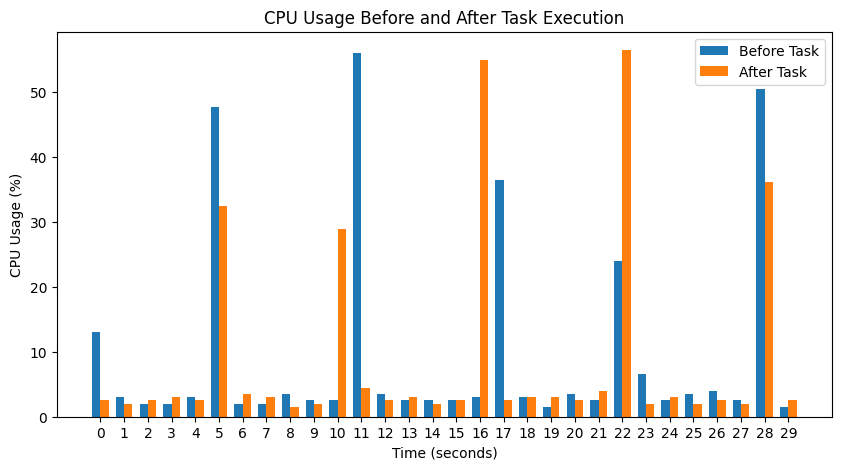

In [ ]:
import psutil
import time
import matplotlib.pyplot as plt
import numpy as np


def monitor_cpu_usage(duration=60):
    end_time = time.time() + duration
    cpu_usage = []

    try:
        while time.time() < end_time:
            cpu_percent = psutil.cpu_percent(interval=1)
            cpu_usage.append(cpu_percent)
            time.sleep(1)
    except KeyboardInterrupt:
        print("Monitoring stopped.")

    return cpu_usage


def perform_task():

    time.sleep(10)


def main():

    start_cpu_usage = monitor_cpu_usage()

    perform_task()


    end_cpu_usage = monitor_cpu_usage()


    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.35
    index = np.arange(len(start_cpu_usage))

    before_task_bar = ax.bar(index, start_cpu_usage, bar_width, label='Before Task')
    after_task_bar = ax.bar(index + bar_width, end_cpu_usage, bar_width, label='After Task')

    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('CPU Usage (%)')
    ax.set_title('CPU Usage Before and After Task Execution')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(range(len(start_cpu_usage)))
    ax.legend()

    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np

def coati_algorithm(arr):
    if not arr:
        return None, None

    max_val = min_val = arr[0]
    max_vals = []
    min_vals = []

    for num in arr:
        if num > max_val:
            max_vals = [num]
            max_val = num
        elif num == max_val:
            max_vals.append(num)
        elif num < min_val:
            min_vals = [num]
            min_val = num
        elif num == min_val:
            min_vals.append(num)

    return max_vals, min_vals

# Define your input arrays
cpu_usage_before_task = [91.0, 100.0, 49.0, 3.5, 4.0, 3.5, 3.5, 54.3, 4.5, 2.5, 3.5, 2.5, 7.6, 30.3, 2.0, 3.0, 3.0, 2.0, 30.7, 8.0, 3.5, 2.5, 3.0, 4.5, 52.5, 2.5, 1.5, 3.5, 3.0, 2.5]
cpu_usage_after_task = [2.0, 50.0, 2.0, 2.5, 2.0, 3.0, 13.6, 27.1, 2.5, 3.5, 3.0, 3.5, 34.0, 2.5, 4.0, 4.0, 2.5, 3.0, 55.5, 2.5, 3.5, 3.5, 3.0, 3.0, 57.0, 2.5, 2.0, 3.0, 2.0, 2.0]


max_before_task, min_before_task = coati_algorithm(cpu_usage_before_task)
max_after_task, min_after_task = coati_algorithm(cpu_usage_after_task)


cpu_usage_before_task_sorted_desc = sorted(cpu_usage_before_task, reverse=True)

cpu_usage_after_task_sorted_asc = sorted(cpu_usage_after_task)


print("highest CPU usage values before task using Coati algorithm:", cpu_usage_before_task_sorted_desc)

print("lowest CPU usage values after task using Coati algorithm:", cpu_usage_after_task_sorted_asc)


highest CPU usage values before task using Coati algorithm: [100.0, 91.0, 54.3, 52.5, 49.0, 30.7, 30.3, 8.0, 7.6, 4.5, 4.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.0, 3.0, 3.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.0, 2.0, 1.5]
lowest CPU usage values after task using Coati algorithm: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 13.6, 27.1, 34.0, 50.0, 55.5, 57.0]


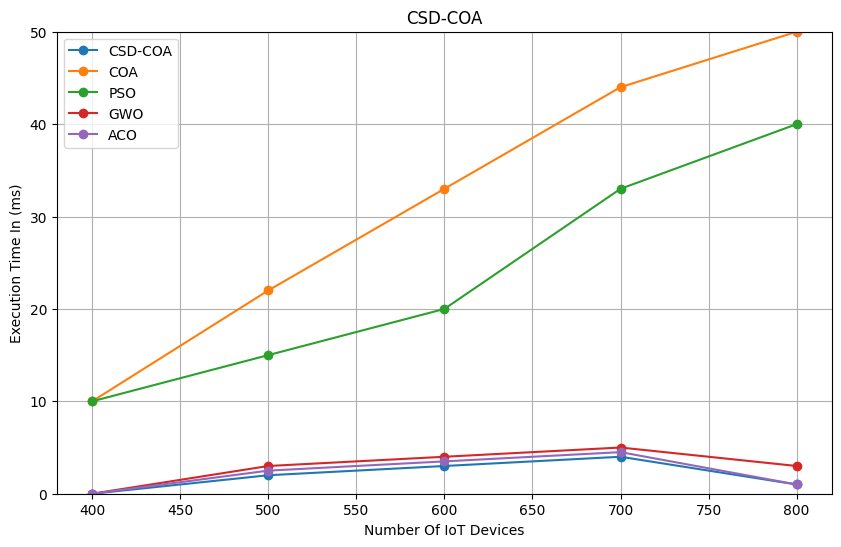

In [ ]:
import matplotlib.pyplot as plt


x = [400, 500, 600, 700, 800]
distributed = [0, 2, 3, 4,1]
centralized = [10, 22, 33, 44, 50]
pbsm = [10, 15, 20, 33, 40]
min_min = [0, 3, 4, 5,3 ]
max_min = [0, 2.5, 3.5, 4.5,1]

plt.figure(figsize=(10, 6))

plt.plot(x, distributed, label='CSD-COA', marker='o')
plt.plot(x, centralized, label='COA', marker='o')
plt.plot(x, pbsm, label='PSO', marker='o')
plt.plot(x, min_min, label='GWO', marker='o')
plt.plot(x, max_min,  label='ACO', marker='o')

plt.xlabel("Number Of IoT Devices")
plt.ylabel("Execution Time In (ms)")
plt.legend()
plt.title('CSD-COA')


plt.ylim(0, 50)
plt.grid(True)

plt.show()


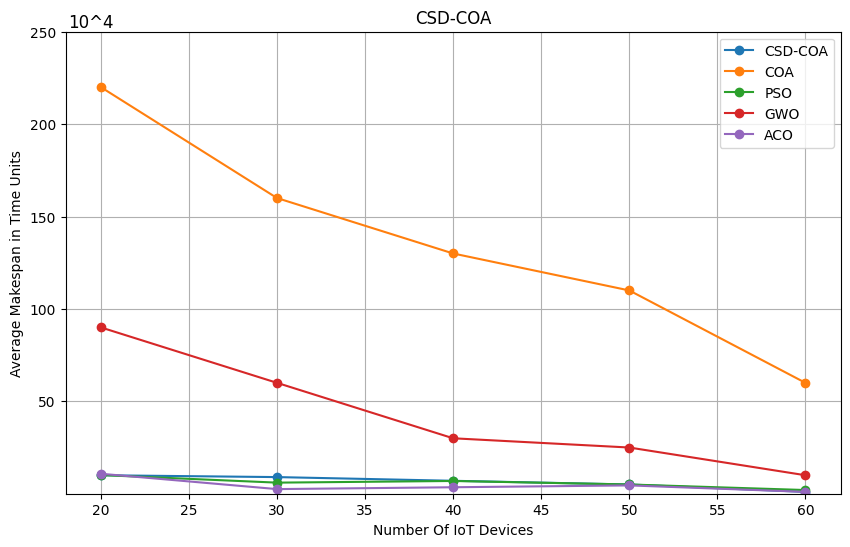

In [ ]:
import matplotlib.pyplot as plt

x = [20, 30, 40, 50, 60]
distributed = [10, 9, 7, 5, 1]
centralized = [220, 160, 130, 110, 60]
pbsm = [10.1, 6, 6.9, 5, 2]
min_min = [90, 60,30, 25, 10]
max_min = [10.8, 2.5, 3.5, 4.5, 1]

plt.figure(figsize=(10, 6))

plt.plot(x, distributed, label='CSD-COA', marker='o')
plt.plot(x, centralized, label='COA', marker='o')
plt.plot(x, pbsm, label='PSO', marker='o')
plt.plot(x, min_min, label='GWO', marker='o')
plt.plot(x, max_min,  label='ACO', marker='o')

plt.xlabel("Number Of IoT Devices")
plt.ylabel("Average Makespan in Time Units")
plt.legend()
plt.title('CSD-COA')

plt.ylim(0, 250)
plt.grid(True)

plt.suptitle('10^4', y=0.91, x=0.15)


plt.yticks([50, 100, 150, 200, 250])

plt.show()


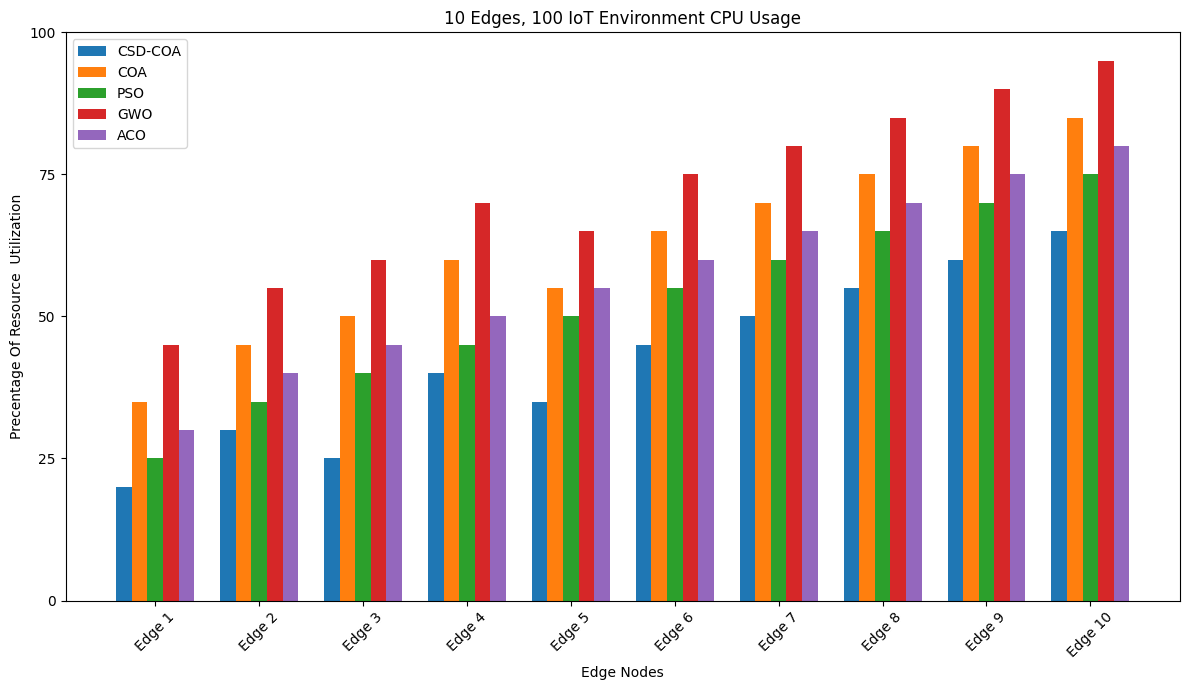

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


edges = ['Edge 1', 'Edge 2', 'Edge 3', 'Edge 4', 'Edge 5', 'Edge 6', 'Edge 7', 'Edge 8', 'Edge 9', 'Edge 10']
num_algorithms = 5


y1 = [20, 30, 25, 40, 35, 45, 50, 55, 60, 65]
y2 = [35, 45, 50, 60, 55, 65, 70, 75, 80, 85]
y3 = [25, 35, 40, 45, 50, 55, 60, 65, 70, 75]
y4 = [45, 55, 60, 70, 65, 75, 80, 85, 90, 95]
y5 = [30, 40, 45, 50, 55, 60, 65, 70, 75, 80]

cpu_usage = np.zeros((len(edges), num_algorithms))


cpu_usage[:, 0] = y1
cpu_usage[:, 1] = y2
cpu_usage[:, 2] = y3
cpu_usage[:, 3] = y4
cpu_usage[:, 4] = y5


plt.figure(figsize=(12, 7))


bar_width = 0.15


index = np.arange(len(edges))


for i in range(num_algorithms):
    plt.bar(index + i * bar_width, cpu_usage[:, i], bar_width, label=f'Algorithm {i+1}')


plt.xlabel('Edge Nodes')
plt.ylabel('Precentage Of Resource  Utilization')
plt.title('10 Edges, 100 IoT Environment CPU Usage')


plt.xticks(index + (num_algorithms - 1) * bar_width / 2, edges, rotation=45)


plt.yticks(np.arange(0, 101, 25))


plt.legend(['CSD-COA', 'COA', 'PSO', 'GWO', 'ACO'])


plt.tight_layout()
plt.show()


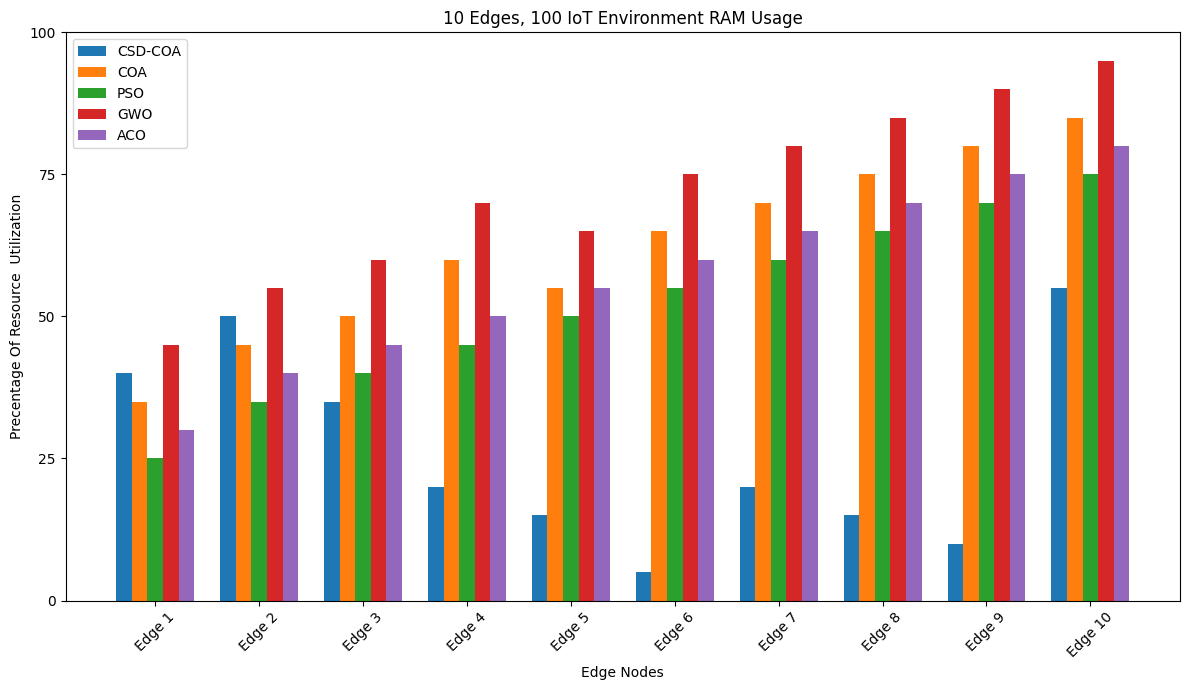

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


edges = ['Edge 1', 'Edge 2', 'Edge 3', 'Edge 4', 'Edge 5', 'Edge 6', 'Edge 7', 'Edge 8', 'Edge 9', 'Edge 10']
num_algorithms = 5


y1 = [40, 50, 35, 20, 15, 5, 20, 15, 10, 55]  # CSD-COA
y2 = [35, 45, 50, 60, 55, 65, 70, 75, 80, 85]  # COA
y3 = [25, 35, 40, 45, 50, 55, 60, 65, 70, 75]  # PSO
y4 = [45, 55, 60, 70, 65, 75, 80, 85, 90, 95]  # GWO
y5 = [30, 40, 45, 50, 55, 60, 65, 70, 75, 80]  # ACO


cpu_usage = np.zeros((len(edges), num_algorithms))


cpu_usage[:, 0] = y1
cpu_usage[:, 1] = y2
cpu_usage[:, 2] = y3
cpu_usage[:, 3] = y4
cpu_usage[:, 4] = y5


plt.figure(figsize=(12, 7))


bar_width = 0.15


index = np.arange(len(edges))


for i in range(num_algorithms):
    plt.bar(index + i * bar_width, cpu_usage[:, i], bar_width, label=f'Algorithm {i+1}')


plt.xlabel('Edge Nodes')
plt.ylabel('Precentage Of Resource  Utilization')
plt.title('10 Edges, 100 IoT Environment RAM Usage')


plt.xticks(index + (num_algorithms - 1) * bar_width / 2, edges, rotation=45)

plt.yticks(np.arange(0, 101, 25))


plt.legend(['CSD-COA', 'COA', 'PSO', 'GWO', 'ACO'])

plt.tight_layout()
plt.show()


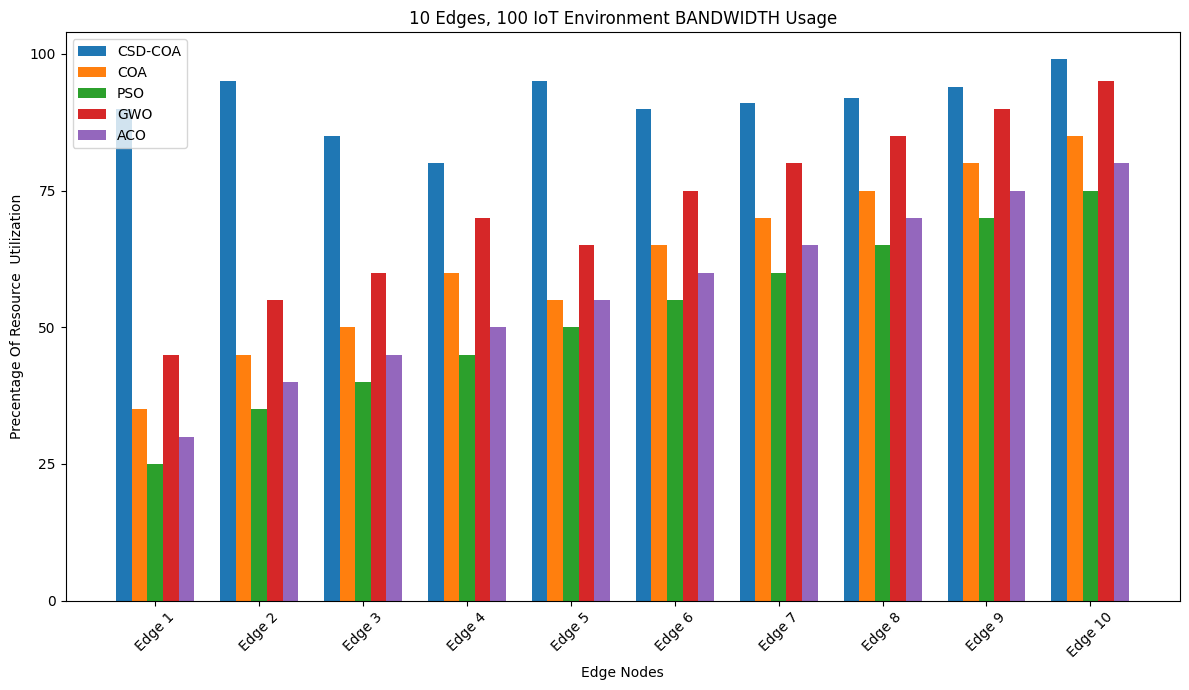

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


edges = ['Edge 1', 'Edge 2', 'Edge 3', 'Edge 4', 'Edge 5', 'Edge 6', 'Edge 7', 'Edge 8', 'Edge 9', 'Edge 10']
num_algorithms = 5


y1 = [90, 95, 85, 80, 95, 90, 91, 92, 94, 99]  # CSD-COA
y2 = [35, 45, 50, 60, 55, 65, 70, 75, 80, 85]  # COA
y3 = [25, 35, 40, 45, 50, 55, 60, 65, 70, 75]  # PSO
y4 = [45, 55, 60, 70, 65, 75, 80, 85, 90, 95]  # GWO
y5 = [30, 40, 45, 50, 55, 60, 65, 70, 75, 80]  # ACO


cpu_usage = np.zeros((len(edges), num_algorithms))


cpu_usage[:, 0] = y1
cpu_usage[:, 1] = y2
cpu_usage[:, 2] = y3
cpu_usage[:, 3] = y4
cpu_usage[:, 4] = y5


plt.figure(figsize=(12, 7))


bar_width = 0.15


index = np.arange(len(edges))


for i in range(num_algorithms):
    plt.bar(index + i * bar_width, cpu_usage[:, i], bar_width, label=f'Algorithm {i+1}')

plt.xlabel('Edge Nodes')
plt.ylabel('Precentage Of Resource  Utilization')
plt.title('10 Edges, 100 IoT Environment BANDWIDTH Usage')


plt.xticks(index + (num_algorithms - 1) * bar_width / 2, edges, rotation=45)


plt.yticks(np.arange(0, 101, 25))


plt.legend(['CSD-COA', 'COA', 'PSO', 'GWO', 'ACO'])


plt.tight_layout()
plt.show()


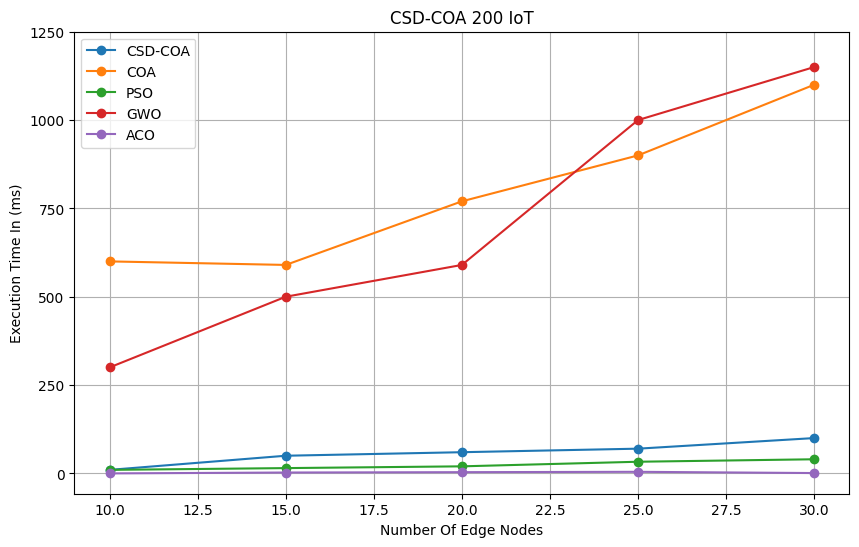

In [ ]:
import matplotlib.pyplot as plt

x = [10, 15, 20, 25, 30]
distributed = [10,50,60,70,100]
centralized = [600,590,770,900,1100]
pbsm = [10, 15, 20, 33, 40]
min_min = [300,500,590,1000,1150]
max_min = [0, 2.5, 3.5, 4.5, 1]

plt.figure(figsize=(10, 6))

plt.plot(x, distributed, label='CSD-COA', marker='o')
plt.plot(x, centralized, label='COA', marker='o')
plt.plot(x, pbsm, label='PSO', marker='o')
plt.plot(x, min_min, label='GWO', marker='o')
plt.plot(x, max_min,  label='ACO', marker='o')

plt.xlabel("Number Of Edge Nodes")
plt.ylabel("Execution Time In (ms)")
plt.legend()
plt.title('CSD-COA 200 IoT')

plt.yticks([0, 250, 500, 750, 1000, 1250])

plt.grid(True)

plt.show()


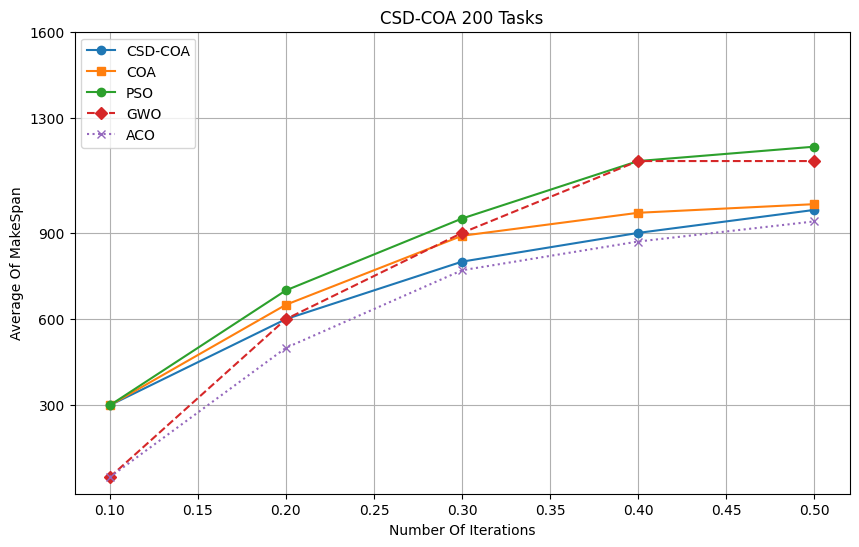

In [ ]:
import matplotlib.pyplot as plt

x = [0.10,0.20,0.30,0.40,0.50]
distributed = [300, 600, 800, 900, 980]
centralized = [300,650,890,970,1000]
pbsm = [300,700,950,1150,1200]
min_min = [50,600,900,1150,1150]
max_min = [50, 500,770,870,940]

plt.figure(figsize=(10, 6))

plt.plot(x, distributed, label='CSD-COA', marker='o')
plt.plot(x, centralized, label='COA', marker='s')
plt.plot(x, pbsm, label='PSO', marker='o')
plt.plot(x, min_min, label='GWO', marker='D', linestyle='--')
plt.plot(x, max_min,  label='ACO', marker='x' , linestyle=':')

plt.xlabel("Number Of Iterations")
plt.ylabel("Average Of MakeSpan")
plt.legend()
plt.title('CSD-COA 200 Tasks')

plt.yticks([300,600,900,1300,1600])

plt.grid(True)

plt.show()


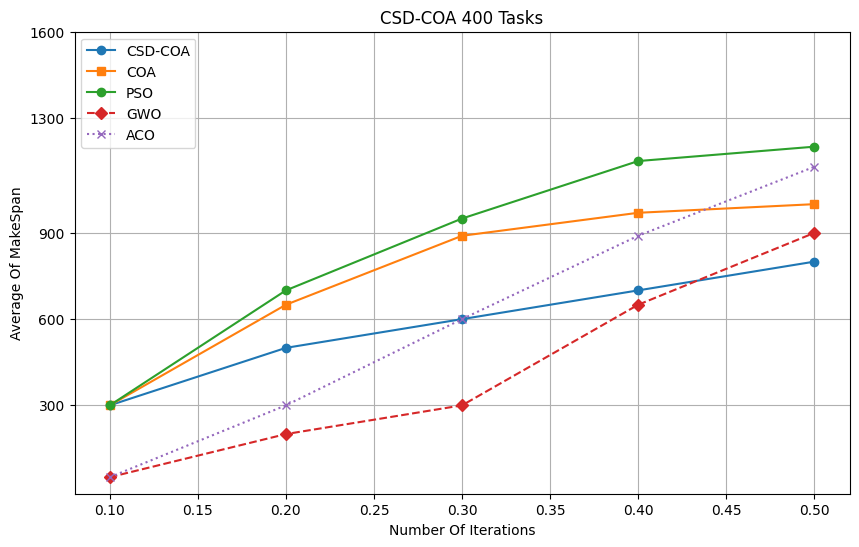

In [ ]:
import matplotlib.pyplot as plt

x = [0.10,0.20,0.30,0.40,0.50]
distributed = [300, 500, 600, 700, 800]
centralized = [300,650,890,970,1000]
pbsm = [300,700,950,1150,1200]
min_min = [50,200,300,650,900]
max_min = [50, 300,600,890,1130]

plt.figure(figsize=(10, 6))

plt.plot(x, distributed, label='CSD-COA', marker='o')
plt.plot(x, centralized, label='COA', marker='s')
plt.plot(x, pbsm, label='PSO', marker='o')
plt.plot(x, min_min, label='GWO', marker='D', linestyle='--')
plt.plot(x, max_min,  label='ACO', marker='x' , linestyle=':')

plt.xlabel("Number Of Iterations")
plt.ylabel("Average Of MakeSpan")
plt.legend()
plt.title('CSD-COA 400 Tasks')

plt.yticks([300,600,900,1300,1600])

plt.grid(True)

plt.show()
